In [1]:
# Importing the necessary libraries and modules.
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, datetime as dt
import warnings 
warnings.filterwarnings('ignore') 

In [2]:
# Loading the data file.
df = pd.read_csv('loan.csv')

**1.Data Understanding, Cleaning and Manipulation**

**1.1 Understanding the data**

In [7]:
# Returns a tuple containing the number of rows and columns in the DataFrame.
df.shape

(39717, 111)

In [9]:
# Number of rows is 39717, and column is 111.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [11]:
# To quickly view the first few rows of a DataFrame.
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


**1.2 Cleaning the unnecessary rows**

In [14]:
# To check if there is unnecessary rows or not.
df['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [22]:
# Dropping the loan_status=='Current' because there is no definitive conclusion about whether they will default or be fully paid in the future.
df = df[df['loan_status']!='Current']
df['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64

In [24]:
# Total number of rows now.
print("Total number of rows now:",len(df))

Total number of rows now: 38577


In [26]:
# To check if there is any dupicate rows.
duplicates = df.duplicated()
df[duplicates]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


**1.3 Cleaning the unnecessary columns**

In [29]:
df.shape

(38577, 111)

In [31]:
# To check the columns if there are any null values.
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               38577
total_bal_ex_mort             38577
total_bc_limit                38577
total_il_high_credit_limit    38577
Length: 111, dtype: int64

In [33]:
# List of all the null columns
null_cols = df.columns[df.apply(lambda col: col.isna().all())].tolist()

print(f"Total columns with null values: {len(null_cols)}")
print("null columns list:")
null_cols

Total columns with null values: 55
null columns list:


['next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_

In [35]:
# Deleting the null columns
df = df.dropna(axis = 1, how = "all")
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [37]:
# To check if there are unique columns 
unique_cols = df.columns[df.apply(lambda col: col.nunique() == len(df))]
unique_cols.tolist()

['id', 'member_id', 'url']

In [39]:
# Delete 'member_id' and 'url' because not required in EDA, we will just use one unique column.
df.drop(['member_id','url'],  axis = 1, inplace = True)

In [41]:
df.shape

(38577, 54)

In [43]:
# Delete the text/description values column as they don't contribute to EDA.
df.drop(columns=['desc','title','emp_title'], inplace=True)
df.shape

(38577, 51)

In [45]:
# Delete the subgroups to keep our analysis to group level.
df = df.drop(['sub_grade'], axis=1)

In [47]:
# Delete behaviourial data since it is done post loan approval and will not contribute to EDA.
behavioural_cols=['inq_last_6mths','delinq_2yrs','earliest_cr_line','last_pymnt_amnt','open_acc', 'pub_rec','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','application_type','last_pymnt_d','last_credit_pull_d','revol_bal','revol_util','total_acc']
df=df.drop(behavioural_cols, axis=1)

In [49]:
# Delete the columns which have single value data since it will have the same value.
df.nunique().sort_values()

pymnt_plan                        1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
tax_liens                         1
loan_status                       2
term                              2
verification_status               3
pub_rec_bankruptcies              3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
addr_state                       50
issue_d                          55
mths_since_last_delinq           95
mths_since_last_record          111
int_rate                        370
zip_code                        822
loan_amnt                       870
funded_amnt                    1019
dti                            2853
annual_inc                     5215
funded_amnt_inv                8050
installment                 

In [51]:
df=df.drop(['pymnt_plan','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','policy_code','collections_12_mths_ex_med','initial_list_status','tax_liens'],axis=1)

In [53]:
df.shape

(38577, 21)

In [55]:
# Dropping the columns which has more than 50% null value.
T_rows = len(df)
for column in df.columns:
    if df[column].isna().mean().round(2) >= 0.50:
        print(column)
        df = df.drop(column,axis=1)
df.shape

mths_since_last_delinq
mths_since_last_record


(38577, 19)

**2. Data Conversion**

In [58]:
# To check the data types of each column in the DataFrame.
df.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [62]:
# Converting 'loan_amnt' and 'funded_amnt' from int64 to float.
df = df.astype({'loan_amnt':'float','funded_amnt':'float'})
df

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0.0
1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0.0
2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0.0
3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0.0
5,1075269,5000.0,5000.0,5000.0,36 months,7.90%,156.46,A,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500.0,2500.0,1075.0,36 months,8.07%,78.42,A,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,802xx,CO,11.33,NaN
39713,90665,8500.0,8500.0,875.0,36 months,10.28%,275.38,C,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,274xx,NC,6.40,NaN
39714,90395,5000.0,5000.0,1325.0,36 months,8.07%,156.84,A,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,017xx,MA,2.30,NaN
39715,90376,5000.0,5000.0,650.0,36 months,7.43%,155.38,A,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,208xx,MD,3.72,NaN


In [64]:
# To count the occurrences of each unique value in the column 'term'.
df['term'].value_counts()

term
36 months    29096
60 months     9481
Name: count, dtype: int64

In [66]:
# Converting 'term' from string to int.
df['term'] = df['term'].apply(lambda x: int(x.strip().split()[0]))
df['term'].dtype

dtype('int64')

In [68]:
df['term'].value_counts()

term
36    29096
60     9481
Name: count, dtype: int64

In [70]:
# Converting 'issue_d' to date type.
df['issue_d'] = pd.to_datetime(df.issue_d, format='%b-%y')
df['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 38577, dtype: datetime64[ns]

In [72]:
df['int_rate'].value_counts()

int_rate
10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: count, Length: 370, dtype: int64

In [74]:
# Converting 'int_rate' from string to float.
df['int_rate']=df['int_rate'].str.strip('%').astype(float)

In [76]:
df['int_rate'].value_counts()

int_rate
10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.96      1
18.36      1
16.15      1
16.01      1
16.20      1
Name: count, Length: 370, dtype: int64

In [78]:
df['emp_length'].value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [80]:
# Converting 'emp_length' from string to int.
df['emp_length'] = df['emp_length'].apply(lambda x: x.strip("years").strip("<").replace(" ", "").replace("+", "") 
                                          if isinstance(x, str) else x)

In [82]:
print(df['emp_length'])

0        10
1         1
2        10
3        10
5         3
         ..
39712     4
39713     3
39714     1
39715     1
39716     1
Name: emp_length, Length: 38577, dtype: object


In [84]:
# Rounding off the below columns to two decimal points.
for c in ['loan_amnt','funded_amnt','funded_amnt_inv', 'int_rate','dti']:
    df[c]=df[c].apply(lambda x: round(x,2))
    print(df[c])

0         5000.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     2500.0
39713     8500.0
39714     5000.0
39715     5000.0
39716     7500.0
Name: loan_amnt, Length: 38577, dtype: float64
0         5000.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     2500.0
39713     8500.0
39714     5000.0
39715     5000.0
39716     7500.0
Name: funded_amnt, Length: 38577, dtype: float64
0         4975.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     1075.0
39713      875.0
39714     1325.0
39715      650.0
39716      800.0
Name: funded_amnt_inv, Length: 38577, dtype: float64
0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38577, dtype: float64
0        27.65
1         1.00
2         8.72
3        20.00
5        11.20
    

In [86]:
# To check if there are any columns having null fields
(df.isnull().sum()*100/len(df))

id                      0.000000
loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

In [88]:
current_rows=len(df)
current_rows

38577

In [90]:
# Dropping 'emp_length' and 'pub_rec_bankruptcies' as they have very less null rows.
df = df.dropna(subset=['emp_length', 'pub_rec_bankruptcies'])

In [92]:
new_rows=len(df)
new_rows

36847

In [94]:
df.isnull().sum()

id                      0
loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
zip_code                0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
dtype: int64

In [96]:
df.shape

(36847, 19)

**3. Derived Columns**

In [99]:
# Creating derived columns: issue month and issue year from 'issue_d'
df['issue_year']=pd.DatetimeIndex(df['issue_d']).year
df['issue_month']=pd.DatetimeIndex(df['issue_d']).month

In [101]:
# Creating a default column, which marks whether a loan is in a default state.
# Defining which loan statuses we consider as default.
default_statuses = ['Charged Off', 'Default']

# Creating the 'is_default' column: 1 for defaulted loans, 0 for fully paid loans
df['is_default'] = df['loan_status'].apply(lambda x: 1 if x in default_statuses else 0)

# Check if the column has been created properly
df[['loan_status', 'is_default']].head()

,loan_status,is_default
0,Fully Paid,0
1,Charged Off,1
2,Fully Paid,0
3,Fully Paid,0
5,Fully Paid,0


In [103]:
# Check the first few rows
df[['loan_status', 'is_default']].value_counts()

loan_status  is_default
Fully Paid   0             31566
Charged Off  1              5281
Name: count, dtype: int64

In [105]:
df.shape

(36847, 22)

**4. Outlier Detection**

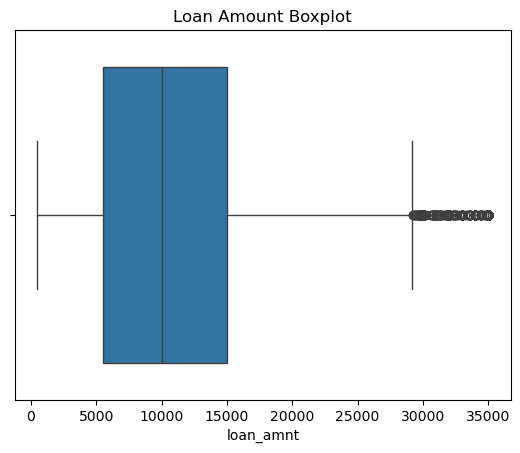

In [108]:
# 1. For loan_amnt
# Boxplot to check for outliers in loan amount
sns.boxplot(x=df['loan_amnt'])
plt.title('Loan Amount Boxplot')
plt.show()

In [110]:
# Treating the outliers
# Capping the outliers using the Interquartile Range (IQR) Method

Q1 = df['loan_amnt'].quantile(0.25)
Q3 = df['loan_amnt'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Cap values using np.clip
df['loan_amnt'] = np.clip(df['loan_amnt'], lower_limit, upper_limit)


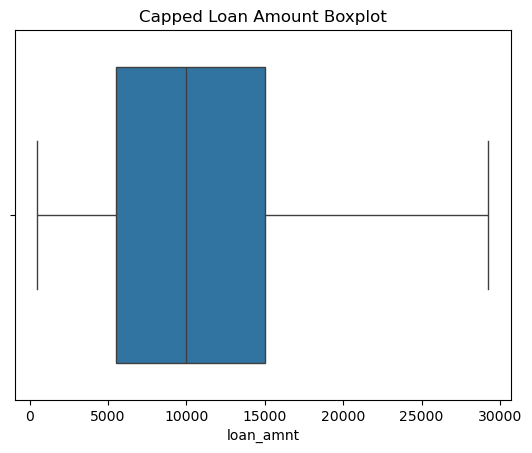

In [112]:
sns.boxplot(x=df['loan_amnt'])
plt.title('Capped Loan Amount Boxplot')
plt.show()

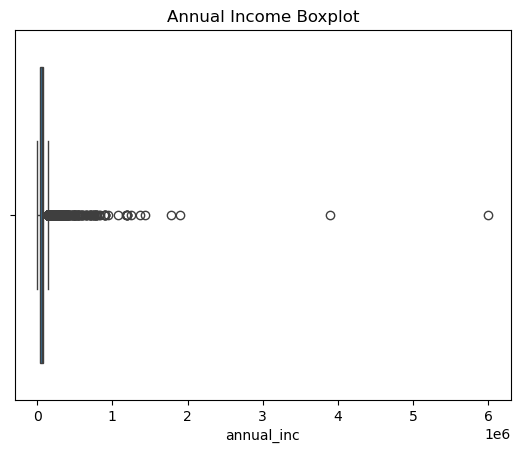

In [114]:
# 2. For annual_inc
# Boxplot to check for outliers in annual_inc
sns.boxplot(x=df['annual_inc'])
plt.title('Annual Income Boxplot')
plt.show()

In [116]:
# Treating the outliers
# Capping the outliers using the Interquartile Range (IQR) Method

Q1 = df['annual_inc'].quantile(0.25)
Q3 = df['annual_inc'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Cap values using np.clip
df['annual_inc'] = np.clip(df['annual_inc'], lower_limit, upper_limit)

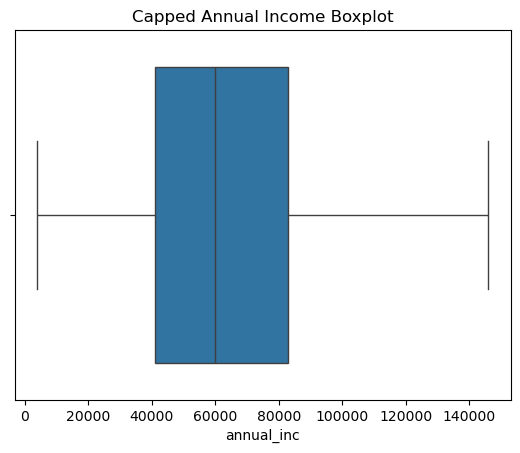

In [118]:
sns.boxplot(x=df['annual_inc'])
plt.title('Capped Annual Income Boxplot')
plt.show()

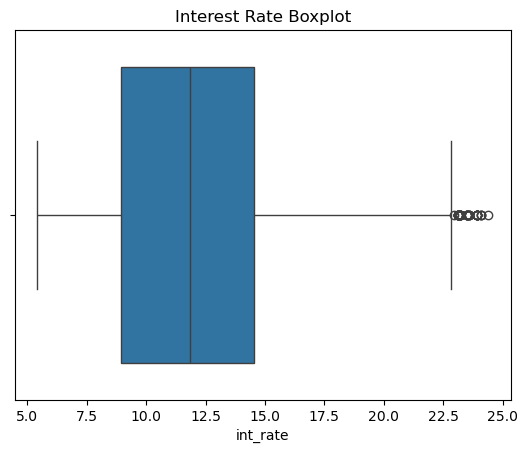

In [120]:
# 3. For int_rate
# Boxplot to check for outliers in int_rate
sns.boxplot(x=df['int_rate'])
plt.title('Interest Rate Boxplot')
plt.show()

In [122]:
# Treating the outliers
# Capping the outliers using the Interquartile Range (IQR) Method

Q1 = df['int_rate'].quantile(0.25)
Q3 = df['int_rate'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Cap values using np.clip
df['int_rate'] = np.clip(df['int_rate'], lower_limit, upper_limit)

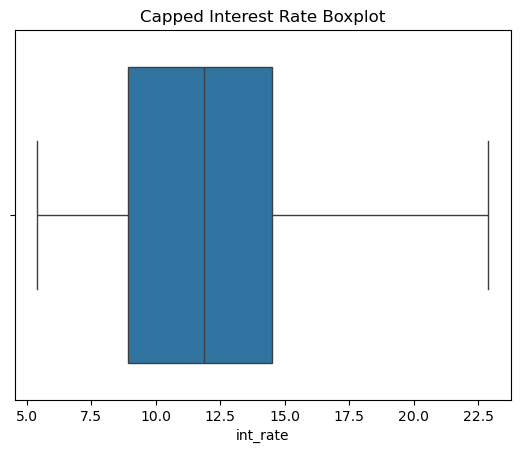

In [124]:
sns.boxplot(x=df['int_rate'])
plt.title('Capped Interest Rate Boxplot')
plt.show()

**5. EDA**

In [127]:
# Basic structure and data types of the dataset
df.info()

# Summary statistics for numerical columns
df.describe()

# First few rows of the dataset to get a sense of the data
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 36847 entries, 0 to 39680
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    36847 non-null  int64         
 1   loan_amnt             36847 non-null  float64       
 2   funded_amnt           36847 non-null  float64       
 3   funded_amnt_inv       36847 non-null  float64       
 4   term                  36847 non-null  int64         
 5   int_rate              36847 non-null  float64       
 6   installment           36847 non-null  float64       
 7   grade                 36847 non-null  object        
 8   emp_length            36847 non-null  object        
 9   home_ownership        36847 non-null  object        
 10  annual_inc            36847 non-null  float64       
 11  verification_status   36847 non-null  object        
 12  issue_d               36847 non-null  datetime64[ns]
 13  loan_status          

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies,issue_year,issue_month,is_default
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,B,10,RENT,...,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0.0,2011,12,0
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,C,1,RENT,...,2011-12-01,Charged Off,car,309xx,GA,1.00,0.0,2011,12,1
2,1077175,2400.0,2400.0,2400.0,36,15.96,84.33,C,10,RENT,...,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0.0,2011,12,0
3,1076863,10000.0,10000.0,10000.0,36,13.49,339.31,C,10,RENT,...,2011-12-01,Fully Paid,other,917xx,CA,20.00,0.0,2011,12,0
5,1075269,5000.0,5000.0,5000.0,36,7.90,156.46,A,3,RENT,...,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0.0,2011,12,0


In [129]:
# Target variable 'loan_status'
# Distribution of loan_status
df['loan_status'].value_counts()

loan_status
Fully Paid     31566
Charged Off     5281
Name: count, dtype: int64

**6. Univariate Analysis**

    
6.1 For Numerical Variables: For continuous variables like loan_amnt, int_rat, etc visualizing their distribution.

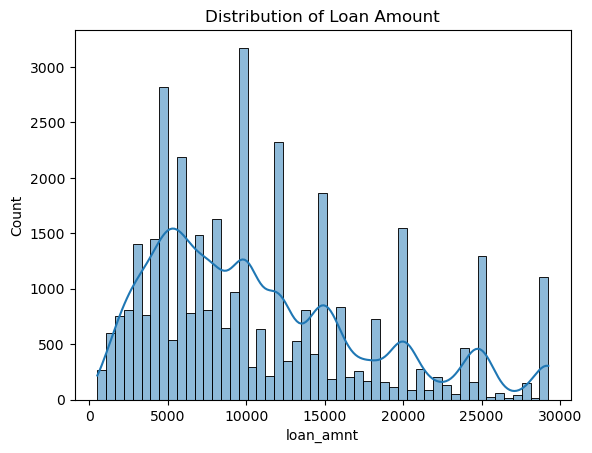

In [132]:
# Loan Amount distribution
sns.histplot(df['loan_amnt'], kde=True)
plt.title('Distribution of Loan Amount')
plt.show()

**Insights:**
The histogram suggests that while most loans are for smaller amounts, there are a significant number of larger loans, indicating a diverse range of borrowing needs.

**Business Sense:**
The lender might need to adjust their risk assessment models to account for the higher loan amounts, as these could pose higher risks.

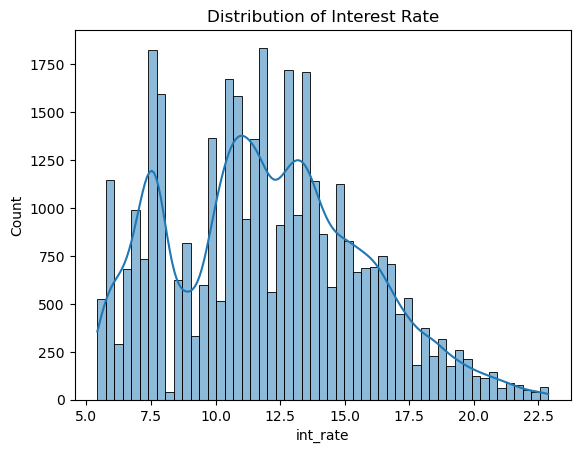

In [138]:
# Interest Rate distribution
sns.histplot(df['int_rate'], kde=True)
plt.title('Distribution of Interest Rate')
plt.show()

**Insights:**
The histogram suggests that while most loans have interest rates around 12.5%, there is a significant proportion of loans with higher rates.

**Business Sense:**
Higher interest rates are often associated with higher risk borrowers. The lender should carefully assess the default risk associated with different interest rate segments.

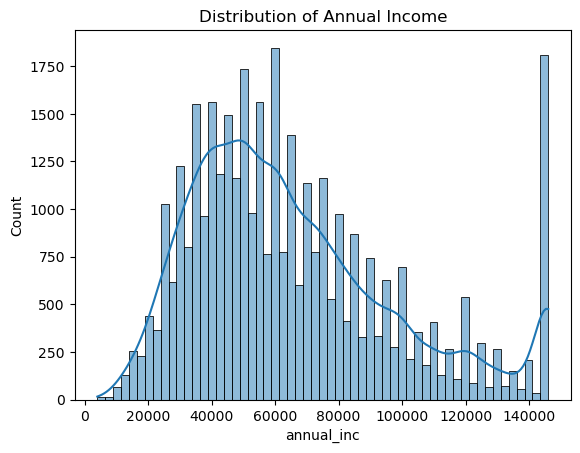

In [141]:
# Annual Income Distribution
sns.histplot(df['annual_inc'], kde=True)
plt.title('Distribution of Annual Income')
plt.show()

**Insights:**
The histogram suggests that while most borrowers have incomes around 60,000, there is a significant proportion of borrowers with higher incomes.

**Business Sense:**
Higher income borrowers might have lower default risk. The lender could use income as a factor in their credit risk assessment.

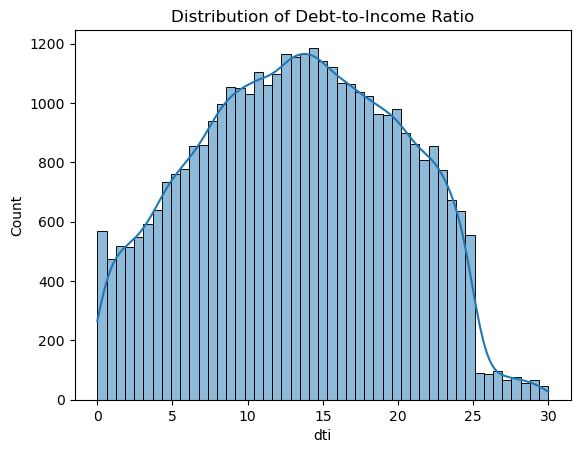

In [144]:
# Debt-to-Income Ratio Distribution
sns.histplot(df['dti'], kde=True)
plt.title('Distribution of Debt-to-Income Ratio')
plt.show()

**Insights:**
The histogram suggests that while most borrowers have debt-to-income ratios around 15, there is a significant proportion of borrowers with higher ratios.

**Business Sense:**
Higher debt-to-income ratios are often associated with higher default risk. The lender could use debt-to-income ratio as a key factor in their credit risk assessment.

6.2 Categorical Variables:For categorical variables like grade, home_ownership, etc visualizing their distribution using bar plots.

<Axes: title={'center': 'Loan Grade Distribution'}, xlabel='grade'>

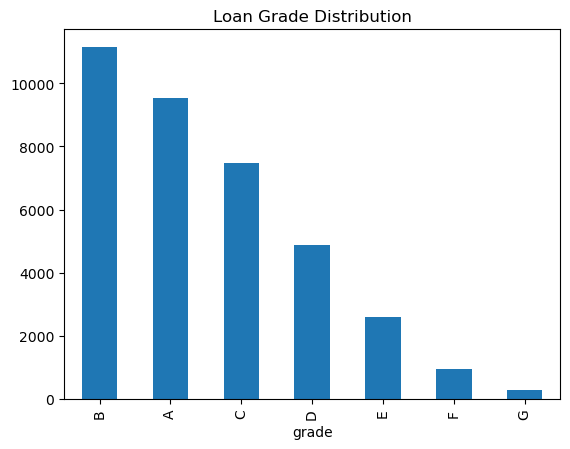

In [148]:
# Loan Grade Distribution
df['grade'].value_counts().plot(kind='bar', title='Loan Grade Distribution')

**Insights:**
The majority of loans are issued with grades B and A, indicating that most borrowers are considered to be in the lower-risk categories.

**Business Sense:**
To minimize default rates and improve profitability, the lender appears to be focusing on lower-risk borrowers, which could be a strategic decision.

<Axes: title={'center': 'Home Ownership Distribution'}, xlabel='home_ownership'>

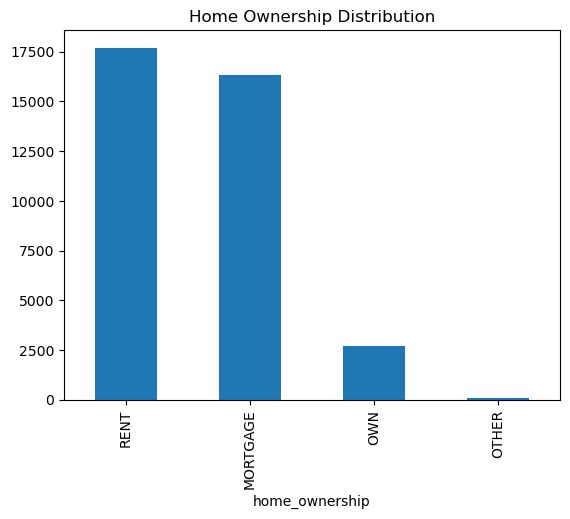

In [151]:
# Home Ownership Distribution
df['home_ownership'].value_counts().plot(kind='bar', title='Home Ownership Distribution')

**Insights:**
The majority of borrowers are either renting or have a mortgage. These two categories account for the vast majority of the observations.

**Business Sense:**
Home ownership might be considered a factor in credit risk assessment, as homeowners might be perceived as more stable and less likely to default.

<Axes: title={'center': 'Employment Length Distribution'}, xlabel='emp_length'>

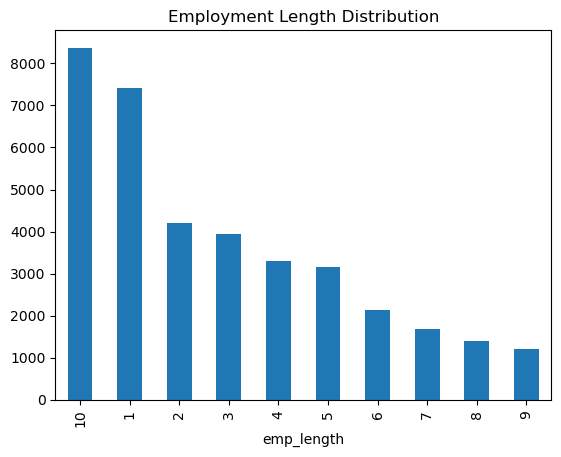

In [154]:
# Employment Length Distribution
df['emp_length'].value_counts().plot(kind='bar', title='Employment Length Distribution')

**Insights:**
The category "10" has the highest frequency, indicating that a significant portion of borrowers have been employed for 10 or more years.

**Business Sense:**
Longer employment history might be considered a positive factor in credit risk assessment, as it suggests stability and financial responsibility.

**7. Segmented Univariate Analysis**
   
    To check how each variable behaves in relation to defaults (e.g.,    is_default). 

<Axes: xlabel='is_default', ylabel='loan_amnt'>

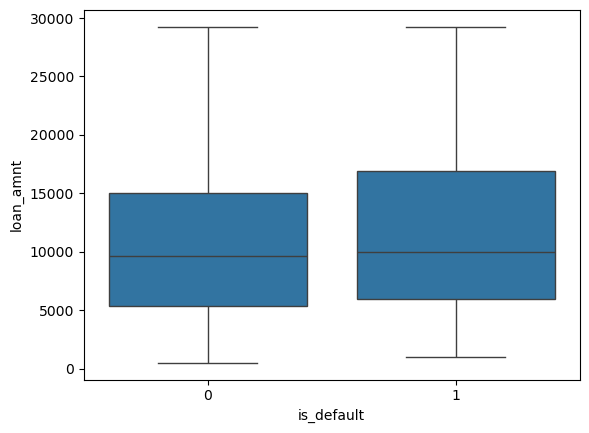

In [158]:
# 7.1 Loan Amount vs Default
# Loan Amount segmented by Default Status
sns.boxplot(x='is_default', y='loan_amnt', data=df)

# defaulters (is_default = 1) and non-defaulters (is_default = 0)

**Insights:**
The interquartile range (IQR) and overall spread of the data seem to be similar for both groups. This indicates that the variability in loan amounts is comparable between defaulters and non-defaulters.

**Business Sense:**
While loan amount might not be a strong predictor of default on its own, it could be useful when combined with other factors.

<Axes: xlabel='is_default', ylabel='int_rate'>

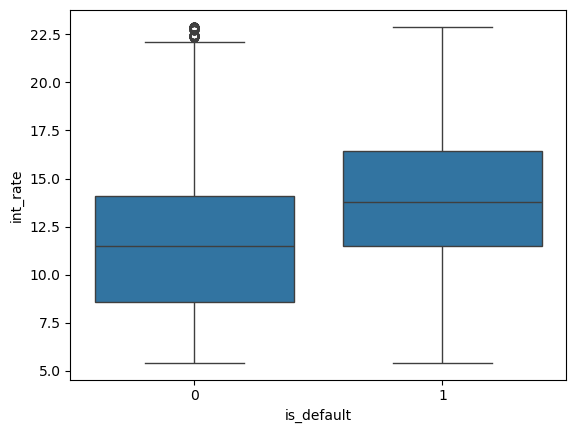

In [161]:
# 7.2 Interest Rate vs Default
# Interest Rate segmented by Default Status
sns.boxplot(x='is_default', y='int_rate', data=df)

#defaulters (is_default = 1) and non-defaulters (is_default = 0)

**Insights:**
The median interest rate for defaulters appears to be slightly higher than that for non-defaulters. This suggests that borrowers who defaulted on their loans might have been charged higher interest rates.

**Business Sense:**
The slightly higher median interest rate for defaulters suggests that interest rate might be a factor influencing default risk.

<Axes: xlabel='is_default', ylabel='dti'>

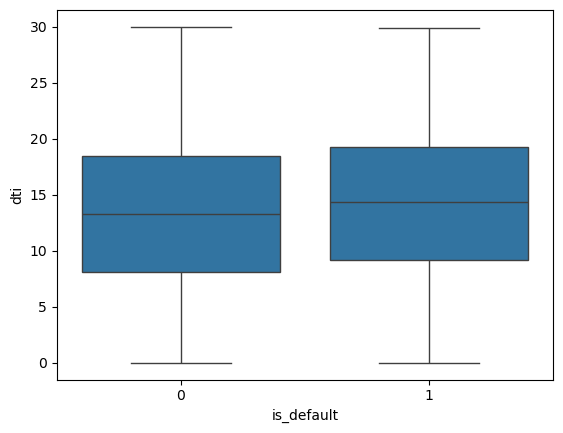

In [164]:
# 7.3  Debt-to-Income Ratio (DTI) vs Default
# Debt-to-Income Ratio segmented by Default Status
sns.boxplot(x='is_default', y='dti', data=df)

#defaulters (is_default = 1) and non-defaulters (is_default = 0)

**Insights:**
The interquartile range (IQR) and overall spread of the data seem to be similar for both groups. This indicates that the variability in debt-to-income ratios is comparable between defaulters and non-defaulters.

**Business Sense:**
The lender could consider incorporating debt-to-income ratio into their credit risk assessment.

**8. Bivariate Analysis**

    8.1 Understanding relationships between different variables, especially in relation to loan_status.

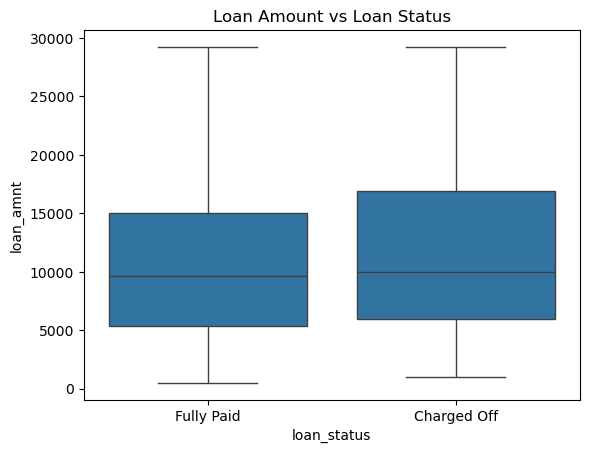

In [168]:
# Numerical vs. Categorical:
# 1. Loan amount vs. loan status
sns.boxplot(x='loan_status', y='loan_amnt', data=df)
plt.title('Loan Amount vs Loan Status')
plt.show()

**Insights:**
The median loan amount for "Charged Off" loans appears to be slightly higher than that for "Fully Paid" loans. This suggests that borrowers who defaulted on their loans might have tended to borrow larger amounts.

**Business Sense:**
The lender could consider incorporating loan amount into their credit risk assessment models.

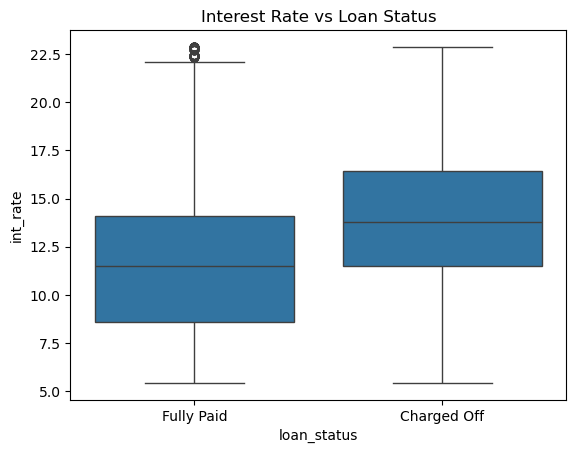

In [171]:
# 2. Interest rate vs. loan status
# Higher interest rates may correlate with higher default risk.
sns.boxplot(x='loan_status', y='int_rate', data=df)
plt.title('Interest Rate vs Loan Status')
plt.show()

**Insights:**
The median loan amount for "Charged Off" loans appears to be slightly higher than that for "Fully Paid" loans. This suggests that borrowers who defaulted on their loans might have tended to borrow larger amount

**Business Sense:**
The slightly higher median interest rate for defaulters suggests that interest rate might be a contributing factor to default risk.

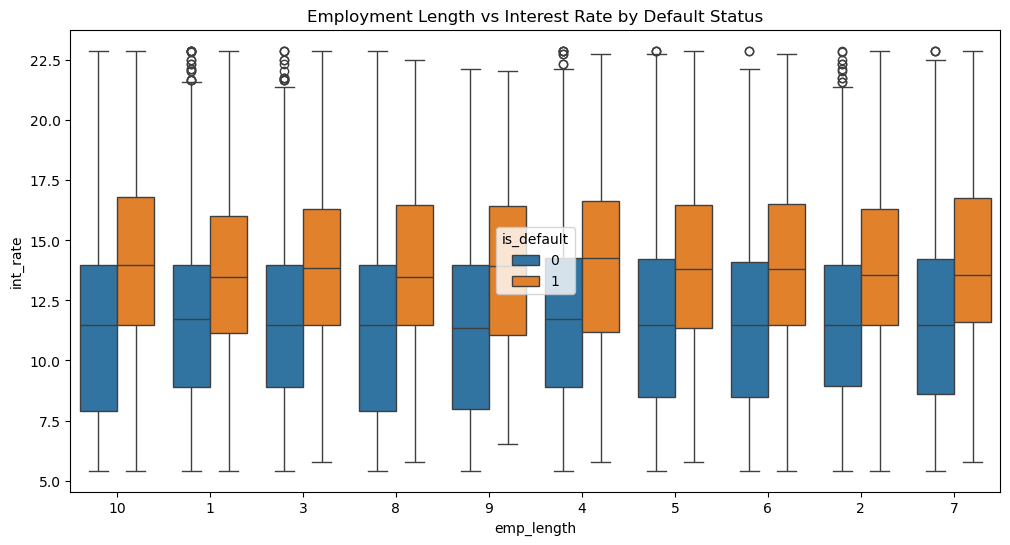

In [199]:
# Employment Length vs Interest Rate with Default
plt.figure(figsize=(12, 6))
sns.boxplot(x='emp_length', y='int_rate', hue='is_default', data=df)
plt.title('Employment Length vs Interest Rate by Default Status')
plt.show()

**Insights:**
The boxplot shows that there is a slight overlap between the interest rates for defaulters and non-defaulters across most employment lengths.

**Business Sense:**
The lender could consider incorporating employment length into their credit risk assessment models, especially if it shows a correlation with other variables.

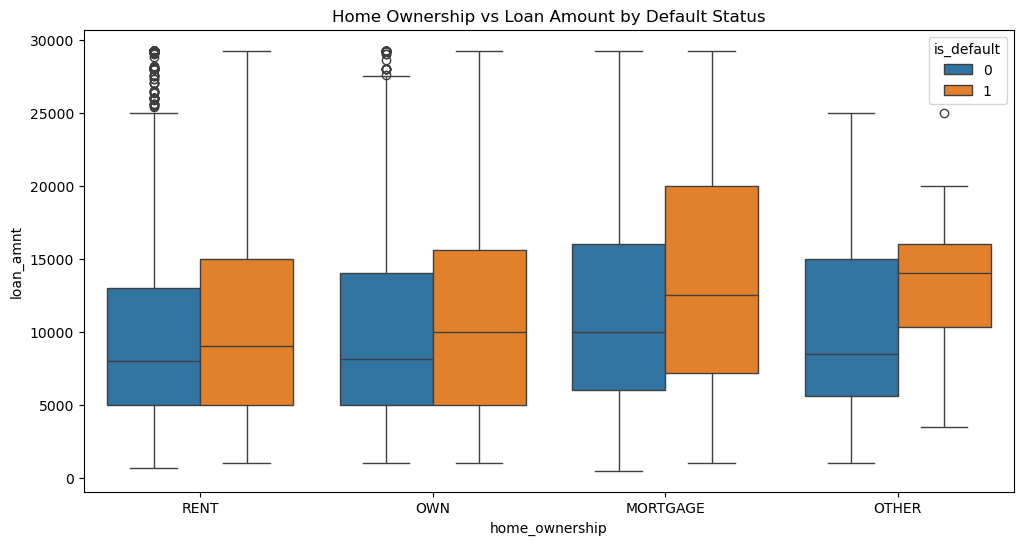

In [201]:
# Home Ownership vs Loan Amount with Default
plt.figure(figsize=(12, 6))
sns.boxplot(x='home_ownership', y='loan_amnt', hue='is_default', data=df)
plt.title('Home Ownership vs Loan Amount by Default Status')
plt.show()

**Insights**
The median loan amounts for the "RENT" and "MORTGAGE" categories appear to be higher than for the "OWN" and "OTHER" categories. This suggests that borrowers who are renting or have a mortgage tend to borrow larger amounts.

**Business Sense**
The lender could consider incorporating home ownership into their credit risk assessment models, especially if it shows a correlation with other variables.

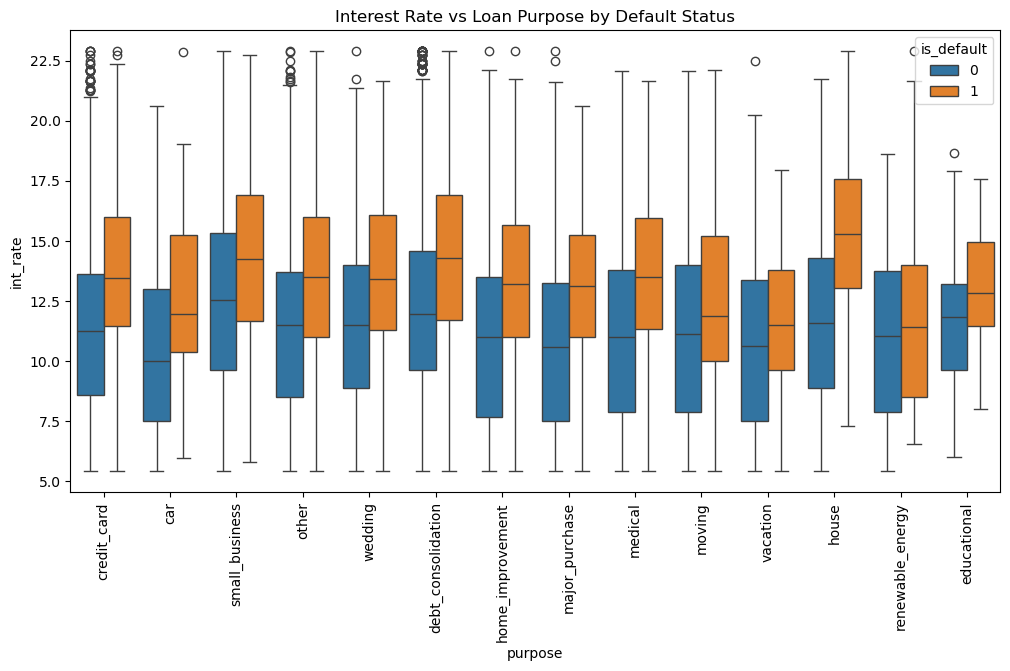

In [203]:
# Interest Rate vs Loan Purpose with Default
plt.figure(figsize=(12, 6))
sns.boxplot(x='purpose', y='int_rate', hue='is_default', data=df)
plt.xticks(rotation=90)
plt.title('Interest Rate vs Loan Purpose by Default Status')
plt.show()

#Certain loan purposes, such as debt consolidation or small business loans, might have higher interest rates and may carry higher default risks.

**Insights**
There are some variations in median interest rates across different loan purposes. Some purposes might have consistently higher or lower interest rates compared to others.

**Business Sense**
The lender could consider incorporating loan purpose into their credit risk assessment models.

**8. Correlation Analysis**

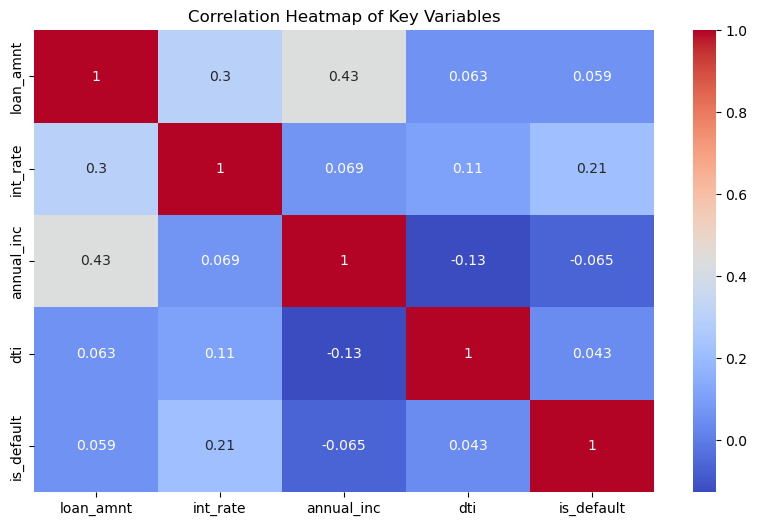

In [184]:
# Heatmap
plt.figure(figsize=(10, 6))
corr = df[['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'is_default']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Key Variables')
plt.show()

**Insights**
1. Strong Positive Correlation:
loan_amnt and annual_inc have a strong positive correlation of 0.43, suggesting that borrowers with higher incomes tend to borrow larger amounts.

2. Weak Positive Correlations:
There are weak positive correlations between loan_amnt and int_rate (0.3), and between annual_inc and int_rate (0.069). This might indicate that borrowers with higher incomes or larger loan amounts could be charged higher interest rates.

3. Negative Correlation:
dti (debt-to-income ratio) and is_default have a negative correlation of -0.065. This suggests that borrowers with lower debt-to-income ratios might be less likely to default.

**Business Sense**
The lender could consider incorporating annual_inc and dti into their credit risk assessment models, as they seem to have some predictive power.

**9. Date Analysis**

<Axes: xlabel='issue_year'>

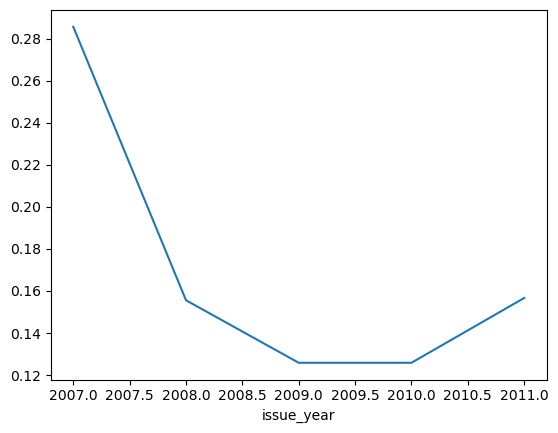

In [188]:
# Analyzing how the default rate changed over time using issue_year column.
df.groupby('issue_year')['is_default'].mean().plot(kind='line')

**Insights**
The default rate appears to have decreased from 2007 to 2009, reached a low point around 2009, and then increased slightly in 2010 and 2011.

**Business Sense**
The lender could analyze the factors that contributed to the decline in default rates and incorporate those insights into their product development.

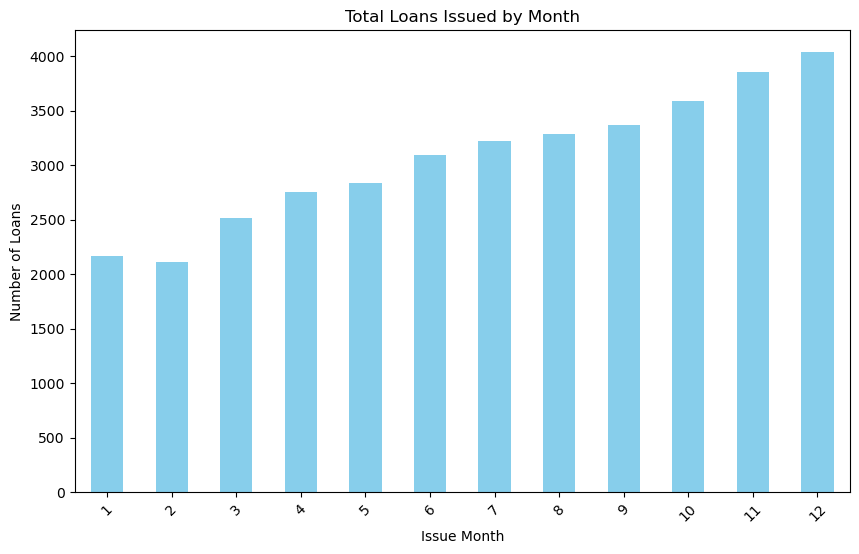

In [191]:
# Count of loans issued by month
loan_counts_by_month = df['issue_month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
loan_counts_by_month.plot(kind='bar', color='skyblue')
plt.title('Total Loans Issued by Month')
plt.xlabel('Issue Month')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)
plt.show()


**Insights**
The number of loans issued generally increases from month 1 to month 12, suggesting a growing trend in lending activity throughout the year.

**Business Sense**
The lender could analyze the factors driving the increase in loan demand to identify opportunities for product development or expansion.